<a href="https://colab.research.google.com/github/aman2802/Machine-Learning/blob/master/Predict_customer_demands_(Apriori_algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Connet Notebook to Google Drive
#Import Data
from google.colab import drive
drive.mount('/content/drive')
transation = pd.read_csv('/content/drive/My Drive/Intern Assignment/transaction_data.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
transation.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [ ]:
transation.tail()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom
1083817,351645,6118145,Tue Aug 21 08:21:00 IST 2018,471849,HEART OF WICKER SMALL,9,2.28,United Kingdom


In [ ]:
transation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [ ]:
transation.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


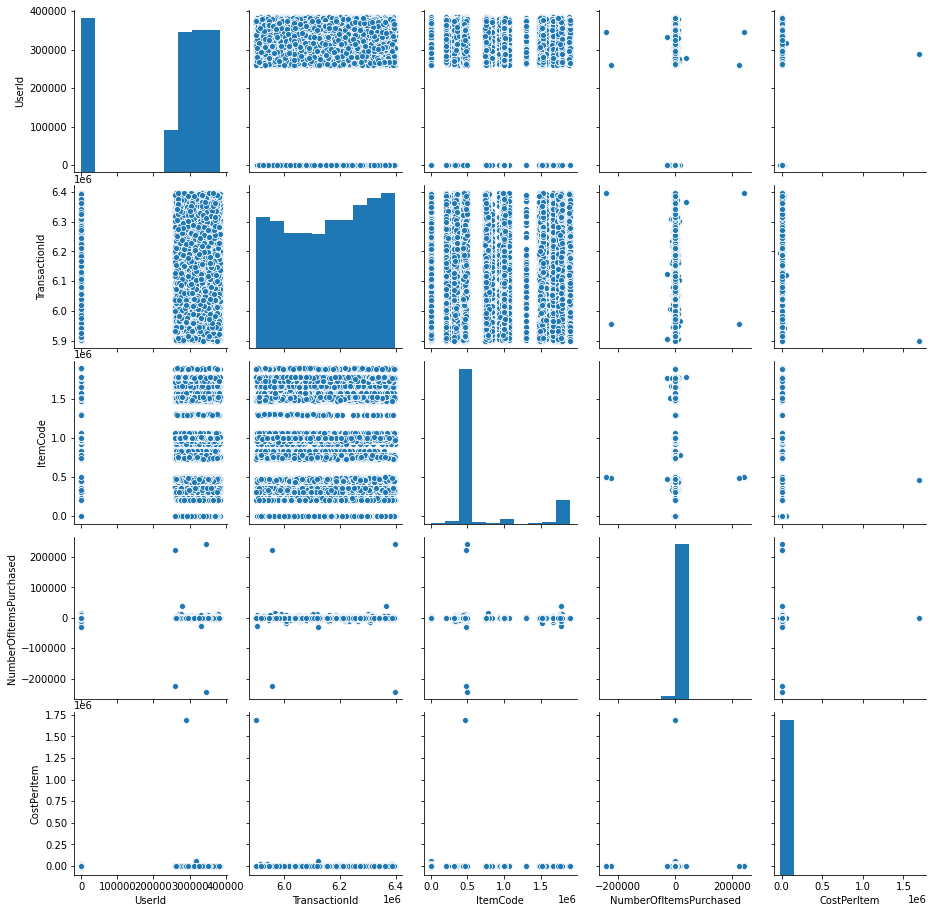

In [ ]:
#Inerpreting unevenness in data and garbage data
sn.pairplot(transation)

In [ ]:
#Removing Rows which have repeated multiple time
transation = transation.drop_duplicates(ignore_index = True) 

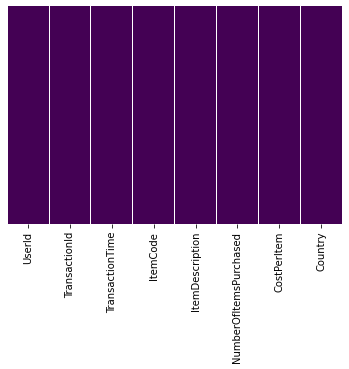

In [ ]:
#Heatmap to see for Null Data
sn.heatmap(transation.isnull(), yticklabels= False, cmap='viridis', cbar= False)

In [ ]:
#Looking into countries which give us more business
transation["Country"].value_counts()

United Kingdom          490233
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     610
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     293
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

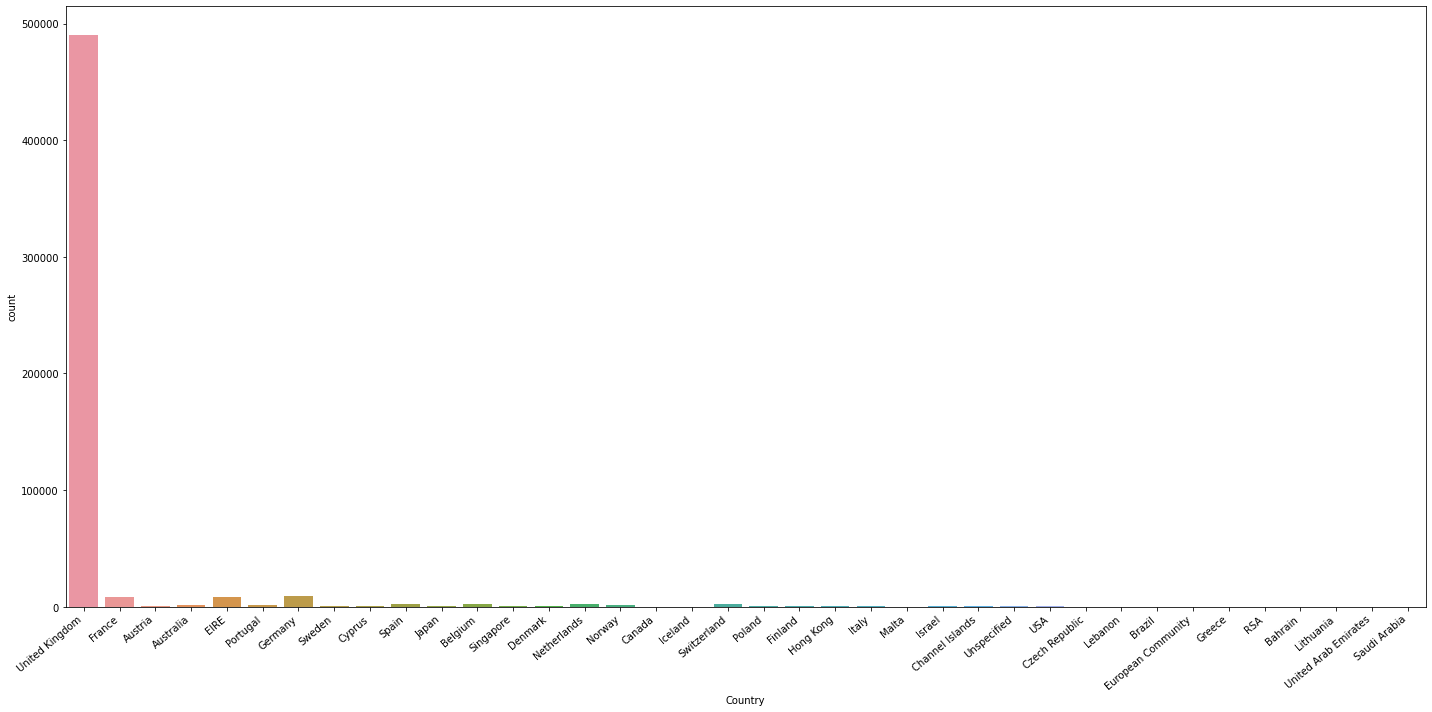

In [ ]:
plt.figure(figsize=(20,10))
ax = sn.countplot(data = transation, x = 'Country')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Removing garbage and uneven data
newdf = transation[transation['UserId'] != -1]
newdf = newdf[newdf['ItemCode'] > 0] 
newdf = newdf[newdf['NumberOfItemsPurchased'] > 0]

In [ ]:
newdf.reset_index(inplace = True)
newdf = newdf[['TransactionId', 'ItemCode', 'ItemDescription']]

In [ ]:
#Creating DataFrame with Items in same transation in same row
df = newdf.astype(str).groupby('TransactionId').agg(','.join).reset_index()

record = []

for i in df.index:
    l = df['ItemCode'][i].split (",")
    record.append(l)

In [ ]:
df.head()

,TransactionId,ItemCode,ItemDescription
0,5900015,"477792,1492113,1764609,1772526,1764609,1787583...","SET 7 BABUSHKA NESTING BOXES,WHITE METAL LANTE..."
1,5900026,"475272,475293","HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"
2,5900037,"1011927,456834,456855,1782459,477729,477645,17...","DOORMAT NEW ENGLAND,HOME BUILDING BLOCK WORD,L..."
3,5900048,"481194,481173,481152,482160","BLUE COAT RACK PARIS FASHION,RED COAT RACK PAR..."
4,5900059,456876,BATH BUILDING BLOCK WORD


In [ ]:
!pip3 install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=d1394a0505d06ffa98eccc405b28a5412f14c7fadc2fa1b51d44b80880afad2d
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
#Takes time for compling 
from apyori import apriori
rules = apriori(record, min_confidence = 0.18, min_support = 0.003, min_lift = 3, min_length = 2)
rules_list = list(rules)

In [ ]:
results = []
for item in rules_list:
    pair = item[0]
    items = [x for x in pair]
    value0 = str(items[0])
    value1 = str(items[1])
    value2 = str(item[1])[:7]
    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    rows = (value0, value1, value2, value3, value4 )
    
    results.append(rows)
    
    Label = ['Item1', 'Item2', 'Support', 'Confidence', 'Lift']
    
    suggest = pd.DataFrame.from_records(results, columns = Label)    

In [ ]:
len(suggest)

10129

In [ ]:
#Save the output
suggest.to_csv(r'/content/drive/My Drive/Intern Assignment/Item_Suggestions.csv')

In [ ]:
buy = input('Enter Item Code of product brought\n=>')
index_ = newdf[newdf["ItemCode"] == int(buy)].index[0]
if index_:
  print('Item =>', newdf['ItemDescription'][index_])
else:
  print('No Item with such Item-Code found, Or the Item-Code had garbage data')

to_buy = []

for i in range(len(suggest)):
    if suggest['Item1'][i] == buy:
        to_buy.append(suggest['Item2'][i])
    elif suggest['Item2'][i] == buy:
        to_buy.append(suggest['Item1'][i])
    elif len(to_buy) == 2:
        break

if len(to_buy) == 2:
    index_ = newdf[newdf["ItemCode"] == int(to_buy[0])].index[0]
    print('Suggested Item1 =>', newdf['ItemDescription'][index_], '  ', to_buy[0])
    index_ = newdf[newdf["ItemCode"] == int(to_buy[1])].index[0]
    print('Suggested Item2 =>', newdf['ItemDescription'][index_], '  ', to_buy[1])

if len(to_buy) == 1:
    index_ = newdf[newdf["ItemCode"] == int(to_buy[0])].index[0]
    print('Suggested Item1 =>', newdf['ItemDescription'][index_], '  ', to_buy[0])
    print('Suggested Item2 => The Item is not much related to any other item')

if len(to_buy) == 0:
    print('Suggested Item1 => The Item is not much related to any other item')
    print('Suggested Item2 => The Item is not much related to any other item')